In [1]:
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
import seaborn as sbn
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
#importing our DASS-42 dataset
data = pd.read_excel(r"Pdata.xlsx")
df = pd.DataFrame(data)
df.head

<bound method NDFrame.head of       Age  Gender  Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  ...  Q34  Q35  Q36  Q37  \
0      24       1   1   1   1   1   1   0   0   0  ...    0    0    0    0   
1      26       1   1   0   0   1   1   2   2   1  ...    1    2    1    1   
2      22       1   1   2   3   1   0   2   0   1  ...    0    0    0    0   
3      24       0   1   1   2   1   2   1   0   1  ...    3    2    1    1   
4      22       1   1   2   0   2   1   0   0   1  ...    3    2    1    0   
...   ...     ...  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...   
3995   22       1   0   3   1   0   0   1   0   0  ...    0    1    1    0   
3996   20       0   1   3   0   0   0   1   1   0  ...    0    1    0    0   
3997   22       0   1   1   2   1   2   0   0   1  ...    0    0    1    0   
3998   20       0   0   1   1   1   2   1   1   1  ...    2    1    0    0   
3999   21       0   1   1   0   0   1   1   1   2  ...    0    1    1    0   

      Q38  Q39  Q40  Q41  Q42  Un

In [3]:
df.drop(columns=['Unnamed: 44'], inplace=True)

In [4]:
df. isnull().head(10)

,Age,Gender,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
others = df.iloc[:,0:2]
others.describe()
others.head()

,Age,Gender
0,24,1
1,26,1
2,22,1
3,24,0
4,22,1


In [6]:
depression_test = df.iloc[:,2:16]
depression_test.head()
depression_test["DEPRESSION SCORE"] = depression_test.sum(axis = 1)
depression_test.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,DEPRESSION SCORE
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,3996.000000,4000.000000,4000.000000,4000.00000,4000.000000
mean,0.954750,1.023250,1.051500,0.743000,0.881000,1.074500,0.864000,1.001250,1.195500,0.882750,1.057808,1.099750,1.155500,1.00100,13.984500
std,0.836288,0.954954,0.983407,0.923669,0.870648,0.905624,0.934731,0.891318,0.951844,0.911982,0.909365,0.932747,0.963614,0.91772,6.352232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,9.000000
50%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,14.000000
75%,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.00000,18.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,42.000000


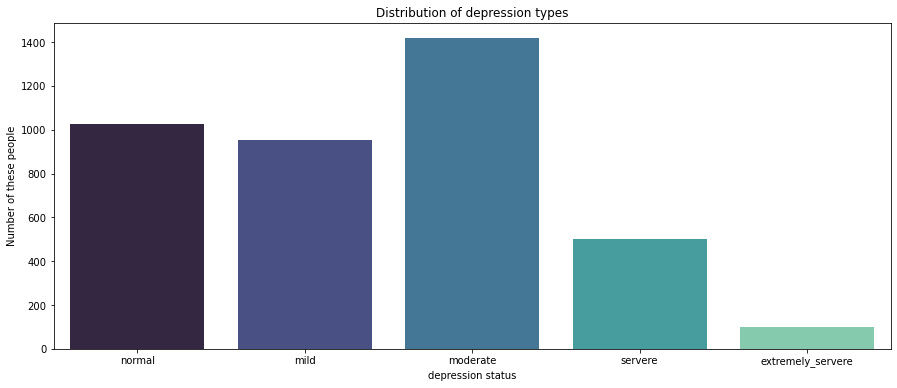

In [19]:
normal = depression_test["DEPRESSION SCORE"][(depression_test["DEPRESSION SCORE"] >= 0) & (depression_test["DEPRESSION SCORE"] <= 9)]
mild = depression_test["DEPRESSION SCORE"][(depression_test["DEPRESSION SCORE"] >= 10) & (depression_test["DEPRESSION SCORE"]<= 13)]
moderate =  depression_test["DEPRESSION SCORE"][(depression_test["DEPRESSION SCORE"]>= 14) & (depression_test["DEPRESSION SCORE"]<= 20)]
servere = depression_test["DEPRESSION SCORE"][(depression_test["DEPRESSION SCORE"] >= 21) & (depression_test["DEPRESSION SCORE"] <= 27)]
extremely_servere = depression_test["DEPRESSION SCORE"][(depression_test["DEPRESSION SCORE"] >= 28)]

aix  = ["normal","mild","moderate","servere","extremely_servere"]
aiy = [len(normal.values),len(mild.values),len(moderate.values),len(servere.values),len(extremely_servere.values)]
plt.figure(figsize=(15,6))
sbn.barplot(x=aix, y = aiy , palette = "mako")
plt.title("Distribution of depression types")
plt.xlabel("depression status")
plt.ylabel("Number of these people")
plt.show()

([<matplotlib.patches.Wedge at 0x2525bff6eb0>,
 [Text(0.7605256676365258, 0.7947331054297516, 'normal'),
  Text(-0.7839023650377, 0.7716845742194804, 'mild'),
  Text(-0.5131951472349854, -0.972949505809249, 'moderate'),
  Text(0.9383552705229316, -0.5740116604058111, 'servere'),
  Text(1.096676507706454, -0.08544376773513786, 'extremely_servere')],
 [Text(0.4148321823471959, 0.4334907847798645, '25.70%'),
  Text(-0.4275831082023818, 0.4209188586651711, '23.85%'),
  Text(-0.27992462576453747, -0.5306997304414085, '35.45%'),
  Text(0.5118301475579626, -0.31309726931226056, '12.52%'),
  Text(0.5981871860217021, -0.04660569149189337, '2.47%')])

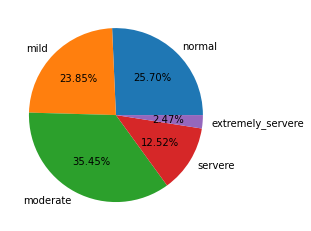

In [20]:
plt.pie(aiy,labels = aix,autopct='%1.2f%%')

In [21]:
Puan_depression = depression_test["DEPRESSION SCORE"]
Puan_depression = pd.DataFrame(Puan_depression)
scored = pd.concat([others,Puan_depression],axis = 1)
scored.tail(10)

,Age,Gender,DEPRESSION SCORE
3990,18,1,14.0
3991,18,1,15.0
3992,20,0,16.0
3993,22,0,16.0
3994,19,0,17.0
3995,22,1,10.0
3996,20,0,12.0
3997,22,0,10.0
3998,20,0,16.0
3999,21,0,15.0


In [22]:
conditions = [
    (scored['DEPRESSION SCORE'] >= 0 ) & (scored['DEPRESSION SCORE'] <= 10),
    (scored['DEPRESSION SCORE'] >= 10 ) & (scored['DEPRESSION SCORE'] <= 16),
    (scored['DEPRESSION SCORE'] >= 14 ) & (scored['DEPRESSION SCORE'] <= 20),
    (scored['DEPRESSION SCORE'] >= 21 ) & (scored['DEPRESSION SCORE'] <= 30),
    (scored['DEPRESSION SCORE'] >= 28 )]
    
values = ["normal","mild","moderate","servere","extremely_servere"]

scored['Depression Level'] = np.select(conditions, values)

scored.head(10)

,Age,Gender,DEPRESSION SCORE,Depression Level
0,24,1,5.0,normal
1,26,1,15.0,mild
2,22,1,19.0,moderate
3,24,0,22.0,servere
4,22,1,14.0,mild
5,18,1,11.0,mild
6,27,1,13.0,mild
7,22,1,12.0,mild
8,21,0,20.0,moderate
9,24,1,6.0,normal


In [11]:
stress_test = df.iloc[:,30:44]
stress_test.head()
stress_test["STRESS SCORE"] = stress_test.sum(axis = 1)
stress_test.describe()

,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,STRESS SCORE
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1.153250,0.914500,0.867750,1.102250,0.978000,0.934500,1.042500,0.888500,0.918500,0.888500,0.927000,1.030250,0.909250,1.077500,13.632250
std,0.943391,0.901883,0.872038,0.908296,0.970181,0.940176,0.916463,0.923732,0.975241,0.974579,0.915358,0.900854,0.897338,0.964482,6.717685
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000
75%,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,18.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,41.000000


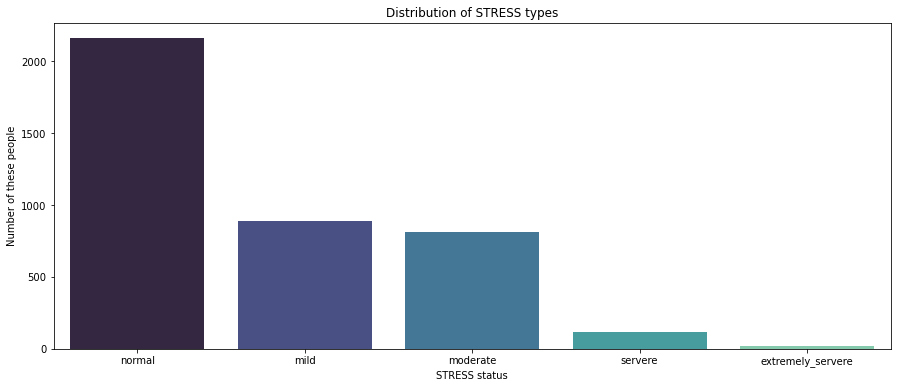

In [23]:
normal = stress_test["STRESS SCORE"][(stress_test["STRESS SCORE"] >= 0) & (stress_test["STRESS SCORE"] <= 14)]
mild = stress_test["STRESS SCORE"][(stress_test["STRESS SCORE"] >= 15) & (stress_test["STRESS SCORE"]<= 18)]
moderate =  stress_test["STRESS SCORE"][(stress_test["STRESS SCORE"]>= 19) & (stress_test["STRESS SCORE"]<= 25)]
servere = stress_test["STRESS SCORE"][(stress_test["STRESS SCORE"] >= 26) & (stress_test["STRESS SCORE"] <= 33)]
extremely_servere = stress_test["STRESS SCORE"][(stress_test["STRESS SCORE"] > 34)]


aix1  = ["normal","mild","moderate","servere","extremely_servere"]
aiy2 = [len(normal.values),len(mild.values),len(moderate.values),len(servere.values),len(extremely_servere.values)]
plt.figure(figsize=(15,6))
sbn.barplot(x=aix1, y = aiy2 , palette = "mako")
plt.title("Distribution of STRESS types")
plt.xlabel("STRESS status")
plt.ylabel("Number of these people")
plt.show()


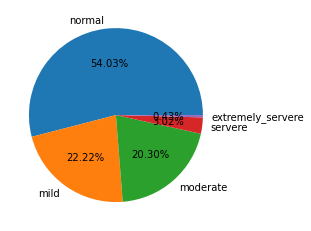

In [24]:
plt.pie(aiy2,labels = aix1,autopct='%1.2f%%')
plt.show()

In [25]:
Puan_stress = stress_test["STRESS SCORE"]
Puan_stress = pd.DataFrame(Puan_stress)
frame = pd.concat([scored,Puan_stress],axis = 1)
frame.head()

,Age,Gender,DEPRESSION SCORE,Depression Level,STRESS SCORE
0,24,1,5.0,normal,0
1,26,1,15.0,mild,13
2,22,1,19.0,moderate,0
3,24,0,22.0,servere,17
4,22,1,14.0,mild,23


In [26]:
conditions1 = [
    (frame['STRESS SCORE'] >= 0 ) & (frame['STRESS SCORE'] <= 14),
    (frame['STRESS SCORE'] >=8 ) & (frame['STRESS SCORE'] <= 18),
    (frame['STRESS SCORE'] >= 16 ) & (frame['STRESS SCORE'] <= 25),
    (frame['STRESS SCORE'] >= 26 ) & (frame['STRESS SCORE'] <= 33),
    (frame['STRESS SCORE'] > 34 )
    
    ]

aix1  = ["normal","mild","moderate","servere","extremely_servere"]


frame['Stress Level'] = np.select(conditions1, aix1)


frame.head(20)

,Age,Gender,DEPRESSION SCORE,Depression Level,STRESS SCORE,Stress Level
0,24,1,5.0,normal,0,normal
1,26,1,15.0,mild,13,normal
2,22,1,19.0,moderate,0,normal
3,24,0,22.0,servere,17,mild
4,22,1,14.0,mild,23,moderate
5,18,1,11.0,mild,4,normal
6,27,1,13.0,mild,7,normal
7,22,1,12.0,mild,6,normal
8,21,0,20.0,moderate,16,mild
9,24,1,6.0,normal,19,moderate


In [27]:
frame.describe()

,Age,Gender,DEPRESSION SCORE,STRESS SCORE
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,21.139500,0.460750,13.984500,13.632250
std,3.079677,0.498519,6.352232,6.717685
min,15.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,9.000000,8.000000
50%,21.000000,0.000000,14.000000,14.000000
75%,22.000000,1.000000,18.000000,18.000000
max,45.000000,1.000000,42.000000,41.000000


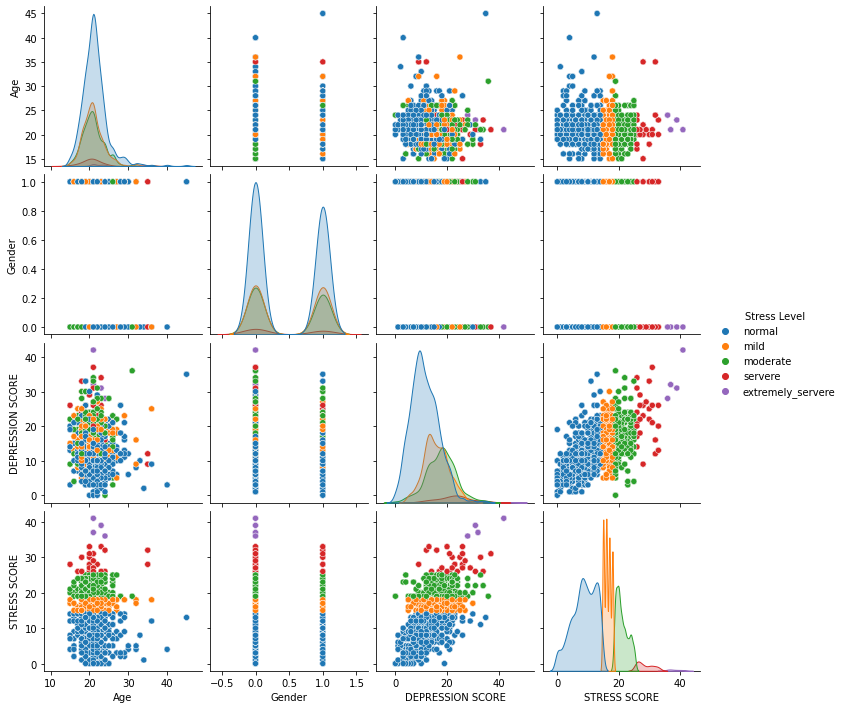

In [28]:
sbn.pairplot(frame, hue = "Stress Level")

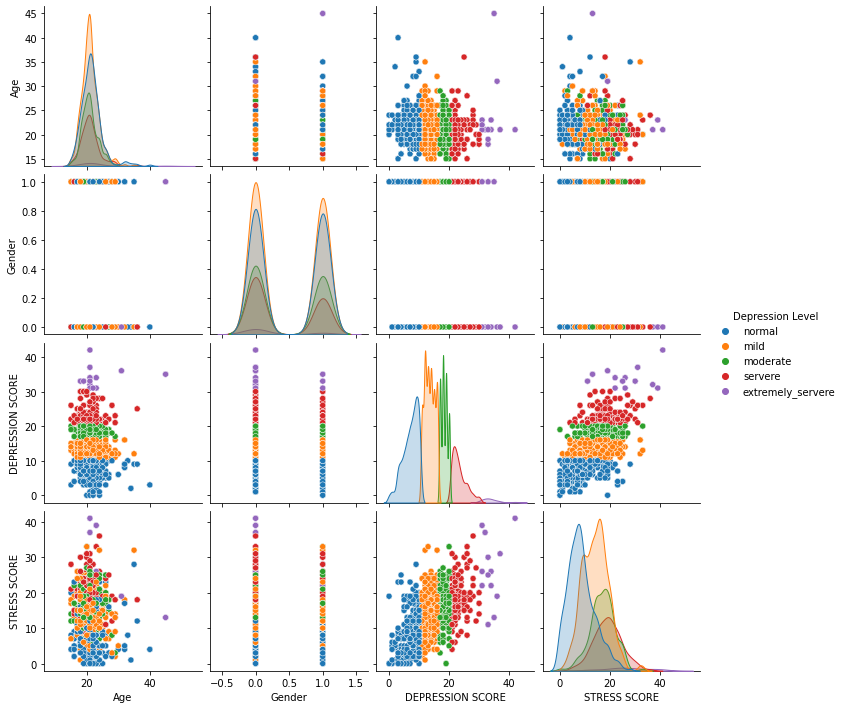

In [29]:
sbn.pairplot(frame, hue = "Depression Level")

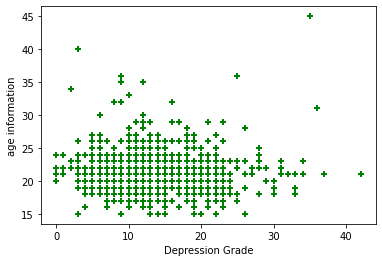

In [30]:

plt.scatter(frame['DEPRESSION SCORE'] , frame['Age'], color = 'green' , marker = '+')

plt.xlabel("Depression Grade")
plt.ylabel("age information")


plt.show()

Text(0, 0.5, 'Age information')

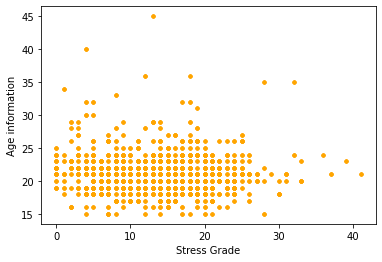

In [31]:
plt.scatter(frame['STRESS SCORE'] , frame['Age'], color = 'orange' , marker = '.')
plt.xlabel("Stress Grade")
plt.ylabel("Age information")

Text(0, 0.5, 'Gender')

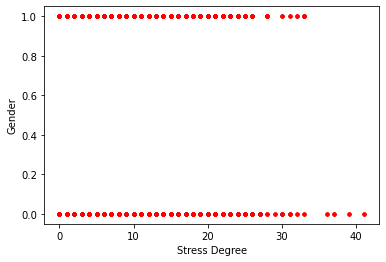

In [32]:
plt.scatter(frame['STRESS SCORE'] , frame['Gender'], color = 'red' , marker = '.')
plt.xlabel("Stress Degree")
plt.ylabel("Gender")

Text(0, 0.5, 'Gender')

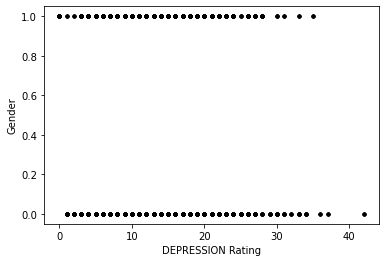

In [33]:
plt.scatter(frame['DEPRESSION SCORE'] , frame['Gender'], color = 'black' , marker = '.')
plt.xlabel("DEPRESSION Rating")
plt.ylabel("Gender")

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
frame["Gender"] = le.fit_transform(frame["Gender"])
frame["Depression Level"] = le.fit_transform(frame["Depression Level"])
frame["Stress Level"] = le.fit_transform(frame["Stress Level"])


my_data_dep = frame.drop(["Stress Level","STRESS SCORE"],axis = 1)
my_data_str = frame.drop(["Depression Level","DEPRESSION SCORE"],axis = 1)
my_data_dep.head(7)

frame


,Age,Gender,DEPRESSION SCORE,Depression Level,STRESS SCORE,Stress Level
0,24,1,5.0,3,0,3
1,26,1,15.0,1,13,3
2,22,1,19.0,2,0,3
3,24,0,22.0,4,17,1
4,22,1,14.0,1,23,2
...,...,...,...,...,...,...
3995,22,1,10.0,3,8,3
3996,20,0,12.0,1,8,3
3997,22,0,10.0,3,3,3
3998,20,0,16.0,1,16,1


In [35]:
my_data_str.head(7)

,Age,Gender,STRESS SCORE,Stress Level
0,24,1,0,3
1,26,1,13,3
2,22,1,0,3
3,24,0,17,1
4,22,1,23,2
5,18,1,4,3
6,27,1,7,3


In [36]:
from sklearn import preprocessing
from sklearn.preprocessing  import LabelEncoder,OneHotEncoder

label_encoder  = preprocessing.LabelEncoder()
onehotencoder  = OneHotEncoder()
frame.head()

,Age,Gender,DEPRESSION SCORE,Depression Level,STRESS SCORE,Stress Level
0,24,1,5.0,3,0,3
1,26,1,15.0,1,13,3
2,22,1,19.0,2,0,3
3,24,0,22.0,4,17,1
4,22,1,14.0,1,23,2


In [37]:
my_data_dep

,Age,Gender,DEPRESSION SCORE,Depression Level
0,24,1,5.0,3
1,26,1,15.0,1
2,22,1,19.0,2
3,24,0,22.0,4
4,22,1,14.0,1
...,...,...,...,...
3995,22,1,10.0,3
3996,20,0,12.0,1
3997,22,0,10.0,3
3998,20,0,16.0,1


In [39]:
X = my_data_str.drop(["Stress Level"],axis = 1) 
X = X.values
y = my_data_str["Stress Level"] 

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.33, random_state = 42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test) 
X_test

array([[ 2.65515526, -0.92379038, -1.73121654],
       [ 0.97855753,  1.08249666,  0.92702218],
       [-1.3686793 , -0.92379038, -0.84513696],
       ...,
       [-0.36272066, -0.92379038,  0.92702218],
       [-0.02740111, -0.92379038, -1.14049682],
       [-0.36272066,  1.08249666, -0.54977711]])

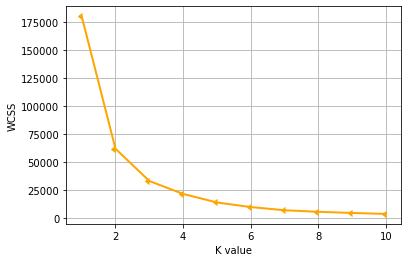

In [41]:
k_stress =my_data_str.loc[:, ["STRESS SCORE"]].values

from sklearn.cluster import KMeans
list  =  []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init = "k-means++")
    kmeans.fit(k_stress)
    list.append(kmeans.inertia_)
plt.figure()
plt.grid()
plt.plot(range(1,11),list, linewidth = 2, color = "orange" , marker = 8 )
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

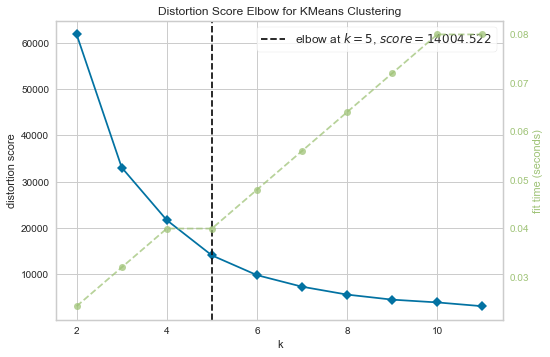

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [42]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,12))
visu.fit(k_stress)
visu.poof()

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


param_grid = {'n_neighbors': np.arange(6,30)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=4)
knn_cv.fit(X,y)
knn_cv.best_score_

0.99675

In [44]:
knn_cv.best_params_

{'n_neighbors': 10}

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
knn = KNeighborsClassifier(n_neighbors=24,metric="minkowski")   #euclidean ve manhattan  
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
y_pred
accuracy_score(y_test,y_pred)

0.9454545454545454

In [46]:
y_pred

array([3, 2, 3, ..., 2, 3, 3])

In [47]:
y_test

555     3
3491    2
527     3
3925    3
2989    3
       ..
328     3
1657    3
2258    2
2691    3
2303    3
Name: Stress Level, Length: 1320, dtype: int32

In [48]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred)
cm_knn

array([[  5,   0,   0,   0,   0],
       [  0, 279,  12,   6,   0],
       [  0,  13, 245,   0,   0],
       [  0,  22,   0, 707,   0],
       [  0,   2,  17,   0,  12]], dtype=int64)

Text(43.0, 0.5, 'Truth')

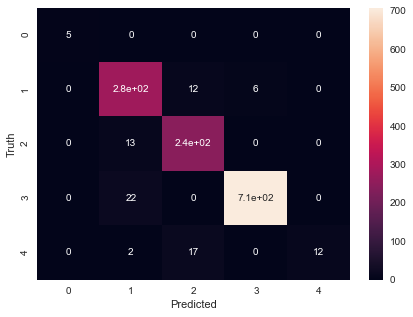

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sbn.heatmap(cm_knn, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.88      0.94      0.91       297
           2       0.89      0.95      0.92       258
           3       0.99      0.97      0.98       729
           4       1.00      0.39      0.56        31

    accuracy                           0.95      1320
   macro avg       0.95      0.85      0.87      1320
weighted avg       0.95      0.95      0.94      1320



In [51]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state = 80)
log_reg.fit(X_train,y_train.ravel())
predict_log = log_reg.predict(X_test)
predict_log

array([3, 2, 3, ..., 2, 3, 3])

In [52]:
from sklearn.metrics import confusion_matrix
cm_linear = confusion_matrix(y_test,predict_log)
cm_linear

array([[  1,   0,   0,   0,   4],
       [  0, 297,   0,   0,   0],
       [  0,   0, 258,   0,   0],
       [  0,   0,   0, 729,   0],
       [  0,   0,  11,   0,  20]], dtype=int64)

In [53]:
accuracy_score(y_test,predict_log)

0.9886363636363636

In [54]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predict_log))

              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       1.00      1.00      1.00       297
           2       0.96      1.00      0.98       258
           3       1.00      1.00      1.00       729
           4       0.83      0.65      0.73        31

    accuracy                           0.99      1320
   macro avg       0.96      0.77      0.81      1320
weighted avg       0.99      0.99      0.99      1320



In [55]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear')
model.fit(X_train, y_train)
model.score(X_test, y_test) 

0.9962121212121212

In [56]:
from sklearn.metrics import confusion_matrix
y_pred_svm = model.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm

array([[  5,   0,   0,   0,   0],
       [  0, 297,   0,   0,   0],
       [  0,   0, 258,   0,   0],
       [  0,   0,   0, 729,   0],
       [  0,   0,   5,   0,  26]], dtype=int64)

In [57]:
accuracy_score(y_test,y_pred_svm)

0.9962121212121212

Text(43.0, 0.5, 'Truth')

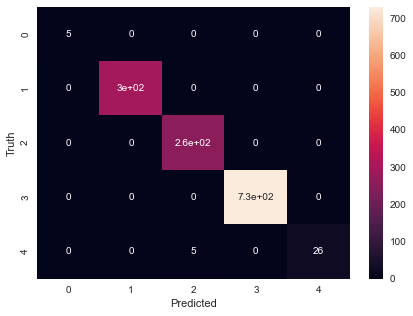

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sbn.heatmap(cm_svm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [59]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00       297
           2       0.98      1.00      0.99       258
           3       1.00      1.00      1.00       729
           4       1.00      0.84      0.91        31

    accuracy                           1.00      1320
   macro avg       1.00      0.97      0.98      1320
weighted avg       1.00      1.00      1.00      1320



In [60]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=8)

clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=2, random_state=8)

In [61]:
y_pred_gini = clf_gini.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9727


In [63]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([3, 1, 3, ..., 2, 3, 3])

In [64]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.9619


In [65]:

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.9619
Test set score: 0.9727


[Text(0.4, 0.8333333333333334, 'X[2] <= 0.115\ngini = 0.622\nsamples = 2680\nvalue = [12, 592, 554, 1432, 90]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 1432\nvalue = [0, 0, 0, 1432, 0]'),
 Text(0.6, 0.5, 'X[2] <= 0.706\ngini = 0.573\nsamples = 1248\nvalue = [12, 592, 554, 0, 90]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 592\nvalue = [0, 592, 0, 0, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.268\nsamples = 656\nvalue = [12, 0, 554, 0, 90]')]

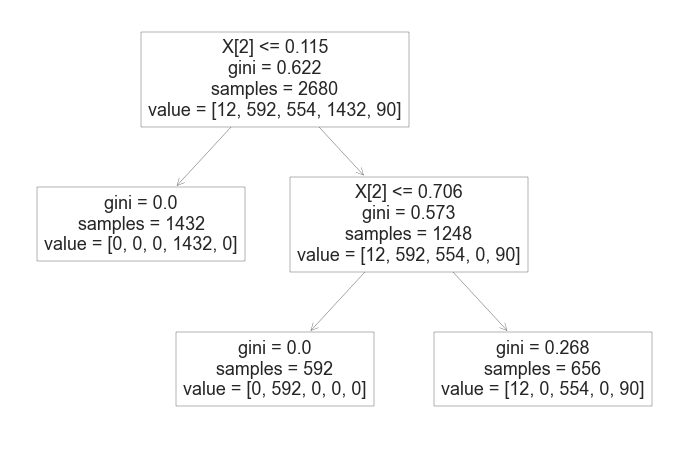

In [66]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [67]:
# Entrop
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=85)
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=85)

In [68]:
y_pred_en = clf_en.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7773


In [70]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

NameError: name 'y_pred_train_en' is not defined

[Text(0.5, 0.75, 'X[2] <= 0.115\nentropy = 1.634\nsamples = 2680\nvalue = [12, 592, 554, 1432, 90]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 1432\nvalue = [0, 0, 0, 1432, 0]'),
 Text(0.75, 0.25, 'entropy = 1.368\nsamples = 1248\nvalue = [12, 592, 554, 0, 90]')]

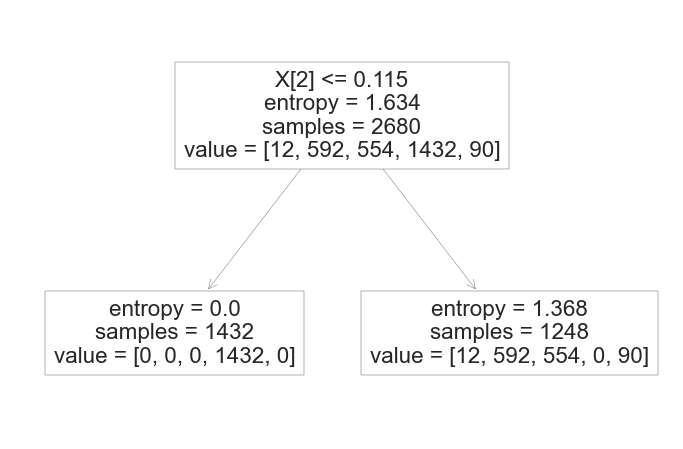

In [71]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [72]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[  0   5   0   0   0]
 [  0 297   0   0   0]
 [  0 258   0   0   0]
 [  0   0   0 729   0]
 [  0  31   0   0   0]]


In [73]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)


Confusion matrix

 [[  0   5   0   0   0]
 [  0 297   0   0   0]
 [  0 258   0   0   0]
 [  0   0   0 729   0]
 [  0  31   0   0   0]]


In [74]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.50      1.00      0.67       297
           2       0.00      0.00      0.00       258
           3       1.00      1.00      1.00       729
           4       0.00      0.00      0.00        31

    accuracy                           0.78      1320
   macro avg       0.30      0.40      0.33      1320
weighted avg       0.67      0.78      0.70      1320

